<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Estat%C3%ADstica-Descritiva/estatistica_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão Rápida

- Medidas de Tendência Central --> Sintetizar um dataset através de um único valor
    - Moda, Mediana, Media
        - Outlier: Media considera tudo e, por isso, é afetada por outliers (o outlier puxa a média pra perto dele)
        - Outlier: Mediana considera o ponto do meio do dataset (o lado bom disso é que ela é menos afetada por outliers)
                
    - Medias geometrica, aritmetica e harmônica
        - harmonica: uma média que penaliza valores muito baixos

- Medidas de Dispersão
    - Range, Desvio Padrão, Variância
        - Variância: Informação contida numa variável

- Distribuições
    - Frequências (histograma)
    - kde - Kernel Density Estimation
        - Gaussian Distribution


# Distribuição Gaussiana
> Objetivos: Observar as propriedades da distribuição normal com dados reais.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/vehicles_messy.csv', low_memory=False)

In [3]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
data.shape

(37843, 83)

In [5]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,...,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,...,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,...,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.139300,0.000000,38.109600,0.000000,2009.000000,-750.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,138.000000,138.304000,127.000000,127.093000,5.350000,122.000000,...,197.577100,181.560900,159.100000,152.187800,2017.000000,4000.000000,7.000000,97.000000,79.000000,88.000000


# Outliers (!)


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000


In [7]:
stats = data.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667,0.000000
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000,0.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000,0.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000,0.000000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000,0.000000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000,0.000000


# Visualizando outilers usando distribuição de variáveis
    - Inter-quartile range rule
    - 3 standard-deviation rule

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

## Curva Gaussiana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.99741

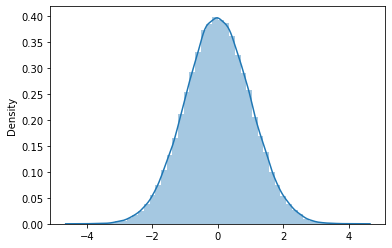

In [9]:
N = 100000
y = np.random.normal(size=N)
sns.distplot(y)

1 - len(y[(y > np.mean(y) + 3 * np.std(y)) | (y < np.mean(y) - 3 * np.std(y))]) / len(y)

## Caso Prático

In [10]:
data.barrels08

0        15.695714
1        29.964545
2        12.207778
3        29.964545
4        17.347895
           ...    
37838    14.982273
37839    14.330870
37840    15.695714
37841    15.695714
37842    18.311667
Name: barrels08, Length: 37843, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


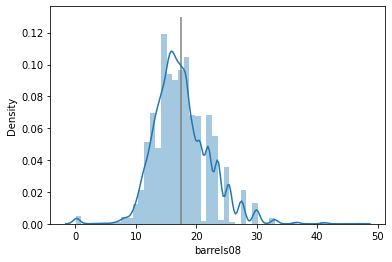

In [11]:
sns.distplot(data.barrels08)

x = data.barrels08.mean()

plt.vlines(x, 0, 0.13, color='gray')

In [12]:
std = stats.loc['barrels08', 'std']
mean = data.barrels08.mean()

In [13]:
mean - std

12.956556094935344

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.12)

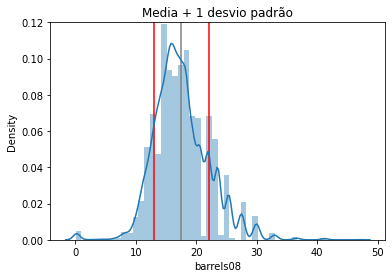

In [14]:
sns.distplot(data.barrels08)

x = data.barrels08.mean()

plt.title('Media + 1 desvio padrão')
plt.vlines(x, 0, 0.13, color='gray')
plt.vlines(mean + std, 0, 0.13, color='red')
plt.vlines(mean - std, 0, 0.13, color='red')
plt.ylim([0, 0.12])

In [ ]:
# data.query(f'barrels08 > {mean - std} and barrels08 < {mean + std}')

In [15]:
data.query(f'{mean - std} < barrels08 < {mean + std}').shape[0] / data.shape[0]

0.7446027006315566

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.12)

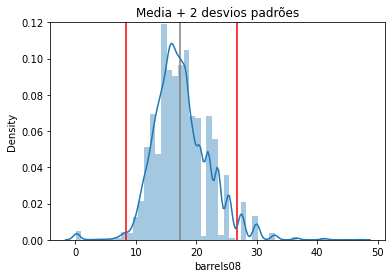

In [16]:
sns.distplot(data.barrels08)

x = data.barrels08.median()
plt.title('Media + 2 desvios padrões')
plt.vlines(x, 0, 0.13, color='gray')
plt.vlines(mean + 2 * std, 0, 0.13, color='red')
plt.vlines(mean - 2 * std, 0, 0.13, color='red')
plt.ylim([0, 0.12])

In [17]:
data.query(f'{mean - 2 * std} < barrels08 < {mean + 2 * std}').shape[0] / data.shape[0]

0.950743862801575

In [18]:
data.barrels08.mean()

17.532506123093643

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.12)

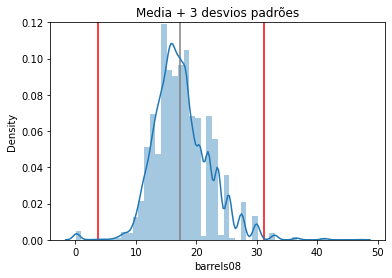

In [19]:
sns.distplot(data.barrels08)
x = data.barrels08.median()
plt.title('Media + 3 desvios padrões')
plt.vlines(x, 0, 0.13, color='gray')
plt.vlines(mean + 3 * std, 0, 0.13, color='red')
plt.vlines(mean - 3 * std, 0, 0.13, color='red')
plt.ylim([0, 0.12])

In [20]:
data.query(f'{mean - 3 * std} < barrels08 < {mean + 3 * std}').shape[0] / data.shape[0]

0.9890336389821103

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


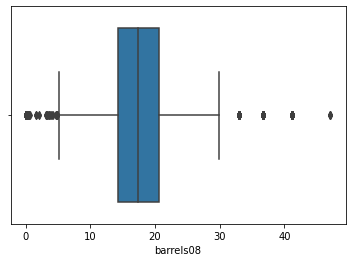

In [21]:
sns.boxplot(data.barrels08)

In [22]:
iqr = stats.loc['barrels08', 'IQR']
q3 = stats.loc['barrels08', '75%']
q1 = stats.loc['barrels08', '25%']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


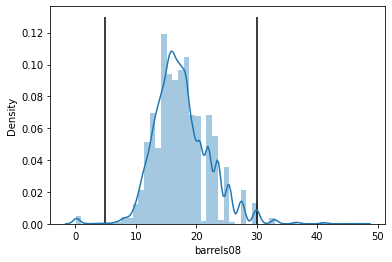

In [23]:
sns.distplot(data.barrels08)
plt.vlines(x=q3 + 1.5 * iqr, ymin=0, ymax=0.13)
plt.vlines(x=q1 - 1.5 * iqr, ymin=0, ymax=0.13)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


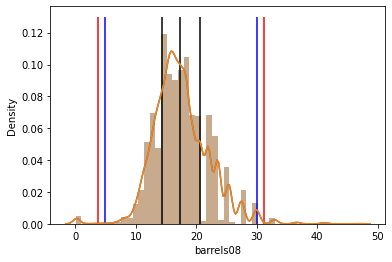

In [24]:
sns.distplot(data.barrels08)

sns.distplot(data.barrels08)
plt.vlines(x=(stats.loc['barrels08']['25%'] - stats.loc['barrels08']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='blue')
plt.vlines(x=(stats.loc['barrels08']['75%'] + stats.loc['barrels08']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='blue')
plt.vlines(x=(stats.loc['barrels08']['25%'] ), ymin=0, ymax=0.13, color='k')
plt.vlines(x=(stats.loc['barrels08']['75%'] ), ymin=0, ymax=0.13, color='k')
plt.vlines(x=(stats.loc['barrels08']['50%'] ), ymin=0, ymax=0.13, color='k')




plt.vlines(x=(stats.loc['barrels08']['mean'] - stats.loc['barrels08']['std'] * 3 ), ymin=0, ymax=0.13, color='red')
plt.vlines(x=(stats.loc['barrels08']['mean'] + stats.loc['barrels08']['std'] * 3 ), ymin=0, ymax=0.13, color='red')


plt.show()

In [25]:
data.barrels08.describe()

count    37843.000000
mean        17.532506
std          4.575950
min          0.060000
25%         14.330870
50%         17.347895
75%         20.600625
max         47.087143
Name: barrels08, dtype: float64

# Distribuições Não Normais

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


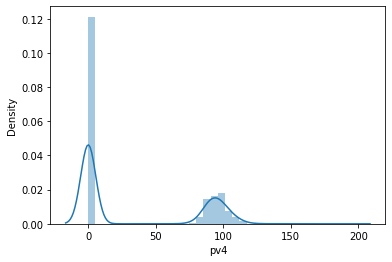

In [26]:
sns.distplot(data.pv4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


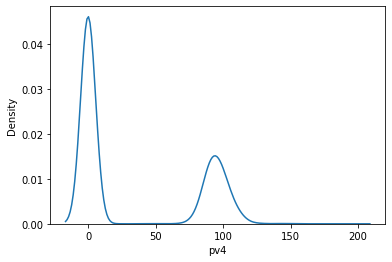

In [27]:
sns.distplot(data.pv4, hist=False)

In [ ]:
data.pv4.describe()

In [ ]:
# só funciona para distribuições normais
sns.distplot(data.pv4, hist=False)
plt.vlines(x=(stats.loc['pv4']['25%'] - stats.loc['pv4']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='red')
plt.vlines(x=(stats.loc['pv4']['75%'] + stats.loc['pv4']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='red')
plt.show() 

In [ ]:
# só funciona para distribuições normais
sns.distplot(data.pv4, hist=False)
plt.vlines(x=(stats.loc['pv4']['mean'] - stats.loc['pv4']['std'] * 3 ), ymin=0, ymax=0.13, color='blue')
plt.vlines(x=(stats.loc['pv4']['mean'] + stats.loc['pv4']['std'] * 3 ), ymin=0, ymax=0.13, color='blue')
plt.show()


In [ ]:
data.describe().T

In [ ]:
data.fuelCostA08.plot(kind='hist')

In [ ]:
upper_limit = data.fuelCostA08.mean() + 3 * data.fuelCostA08.std()
lower_limit = data.fuelCostA08.mean() - 3 * data.fuelCostA08.std()

In [ ]:
data.fuelCostA08.plot(kind='hist')
plt.vlines(upper_limit, 0, 36000)
plt.ylim([0, 36000])

In [ ]:
data.fuelCostA08.describe()

In [ ]:
upper_limit = stats.loc['fuelCostA08', '75%'] + 1.5 * stats.loc['fuelCostA08', 'IQR']
lower_limit = stats.loc['fuelCostA08', '25%'] - 1.5 * stats.loc['fuelCostA08', 'IQR']

data.fuelCostA08.plot(kind='hist')
plt.vlines(upper_limit, 0, 36000, color='red')
plt.ylim([0, 36000])

In [ ]:
sns.boxplot(data.fuelCostA08)

In [ ]:
# por quê?
stats.loc['pv4']

In [ ]:
(data.pv4 != 0).sum()

In [ ]:
(data.pv4 != 0).mean()

In [ ]:
(data.fuelCostA08 != 0).mean()

In [ ]:
data.pv4.quantile(q=0.95)

In [ ]:
# sns.distplot(data.query('pv4 != 0').pv4)

In [ ]:
# sns.distplot(np.clip(data.pv4, data.pv4.quantile(q=0.70), data.pv4.max()), hist=False)

# Skewness

O quão assimétrica é sua curva

In [ ]:
N = 10000

In [ ]:
uniform = np.random.randint(0, 100, size=N)
sns.distplot(uniform)

In [ ]:
normal = np.random.normal(size=N)
sns.distplot(normal, hist=False)

In [ ]:
df = pd.DataFrame(normal, columns=['normal'])

In [ ]:
df

In [ ]:
df.normal.skew()

## Assimétrica para direita

In [ ]:
gamma = np.random.gamma(shape=0.5, size=N )
sns.distplot(gamma, hist=False)

plt.vlines(np.mean(gamma), 0, 1, color='red')
plt.vlines(np.median(gamma), 0, 1, color='k')

plt.ylim([0, 2])

In [ ]:
df['gamma'] = gamma

In [ ]:
df.skew()

## Assimétrica para esquerda

In [ ]:
beta = np.random.beta(a=500, b=0.01, size=N )
sns.distplot(beta, hist=False)

In [ ]:
df['beta'] = beta

In [ ]:
df['uniform'] = uniform

In [ ]:
df.skew()